<a href="https://colab.research.google.com/github/ardrapadmakumar/plant-disease-detection/blob/main/crop_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

Unzipping dataset

In [ ]:
#import zipfile
#import os

# Path to your zip file in Google Drive
#zip_path = "/content/drive/MyDrive/dataset/crop_dataset/Crop_disease/crop_diesease/train.zip"

# Path to extract
#extract_path = "/content/drive/MyDrive/dataset/crop_dataset/Crop_disease/crop_diesease"

# Unzipping
#with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#  zip_ref.extractall(extract_path)

#print("Extraction completed!")

Extraction completed!


**Data Preprocessing**


Train- Image Preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/crop_dataset/Crop_disease/crop_diesease/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 41483 files belonging to 38 classes.


Validation Image Processing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/crop_dataset/Crop_disease/crop_diesease/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [ ]:
for x,y in training_set:
  print(x,x.shape)
  print(y,y.shape)
  break

tf.Tensor(
[[[[143.5  135.5  132.5 ]
   [134.5  126.5  123.5 ]
   [136.5  128.5  125.5 ]
   ...
   [162.25 157.25 154.25]
   [160.25 155.25 152.25]
   [162.25 157.25 154.25]]

  [[138.25 130.25 127.25]
   [133.25 125.25 122.25]
   [133.75 125.75 122.75]
   ...
   [160.75 155.75 152.75]
   [154.5  149.5  146.5 ]
   [158.25 153.25 150.25]]

  [[135.   127.   124.  ]
   [136.   128.   125.  ]
   [134.25 126.25 123.25]
   ...
   [165.5  160.5  157.5 ]
   [153.25 148.25 145.25]
   [154.5  149.5  146.5 ]]

  ...

  [[124.75 116.75 113.75]
   [131.75 123.75 120.75]
   [120.75 112.75 109.75]
   ...
   [161.75 157.75 154.75]
   [182.75 178.75 175.75]
   [178.   174.   171.  ]]

  [[139.5  131.5  128.5 ]
   [148.   140.   137.  ]
   [137.25 129.25 126.25]
   ...
   [162.   158.   155.  ]
   [186.75 182.75 179.75]
   [176.5  172.5  169.5 ]]

  [[129.25 121.25 118.25]
   [124.   116.   113.  ]
   [141.5  133.5  130.5 ]
   ...
   [194.   190.   187.  ]
   [168.   164.   161.  ]
   [185.25 181.25 17

**Building model**

In [5]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D, Dropout
from tensorflow.keras.models import Sequential

In [6]:
model=Sequential()

Building Convolution Layer

In [7]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [9]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [10]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Dropout(0.25)) #To avoid overfitting

In [13]:
model.add(tf.keras.layers.Flatten())

In [14]:
model.add(Dense(units=1500,activation='relu'))

In [15]:
model.add(Dropout(0.4))

**Output Layer**

In [16]:
model.add(Dense(units=38,activation='softmax'))

**Compiling model**

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

**Training model**

In [ ]:
training_history=model.fit(x=training_set,validation_data=validation_set,epochs=3)

Epoch 1/3
1285/1297 ━━━━━━━━━━━━━━━━━━━━ 56s 5s/step - accuracy: 0.4608 - loss: 1.7668 

**Model Evaluation**

Evaluation on training set

In [ ]:
train_loss, train_acc = model.evaluate(training_set)

   5/1297 ━━━━━━━━━━━━━━━━━━━━ 41:28 2s/step - accuracy: 0.0586 - loss: 3.3968

KeyboardInterrupt: 

In [ ]:
print(train_loss,train_acc)

Evaluation on Validation Set

In [ ]:
val_loss, val_acc = model.evaluate(validation_set)

In [ ]:
print(val_loss,val_acc)

**Saving Model**

In [ ]:
model.save("trained_model.keras")

In [ ]:
training_history.history

Recording History in json

In [ ]:
import json
with open("training_hist.json","w") as f:
  json.dump(training_history.history,f)

**Accuracy Visualization**

In [ ]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No of epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

**Other metrics for model evaluation**

In [ ]:
class_name= validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [ ]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/dataset/crop_dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,

)

Found 33 files belonging to 1 classes.


In [ ]:
y_pred= model.predict(test_set)
y_pred,y_pred.shape

2/2 ━━━━━━━━━━━━━━━━━━━━ 18s 1s/step


(array([[0.00932042, 0.03409791, 0.00079864, ..., 0.04034428, 0.00578728,
         0.00336307],
        [0.01756797, 0.03167918, 0.00538286, ..., 0.02992357, 0.01281151,
         0.00867545],
        [0.0148015 , 0.03160959, 0.00464958, ..., 0.02793059, 0.01213664,
         0.00734505],
        ...,
        [0.01695909, 0.03181828, 0.00471777, ..., 0.03184313, 0.01193434,
         0.00929707],
        [0.01807487, 0.03385178, 0.00403683, ..., 0.02851878, 0.01209659,
         0.00705352],
        [0.01679065, 0.03818001, 0.00375486, ..., 0.03876591, 0.01172199,
         0.00724268]], dtype=float32),
 (33, 38))

In [ ]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [ ]:
predicted_categories

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([13, 18, 18, 13, 18, 18, 13, 28,  5,  5, 18,  5, 18, 18, 18, 13, 18,
       13, 18, 18, 18, 18, 18, 18,  5, 18, 18, 18, 18, 18,  5, 18, 24])>

In [ ]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(33, 1), dtype=float32, numpy=
array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)>

In [ ]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(33,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])>

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

**Confusion Matrix**

In [ ]:
cm=confusion_matrix(Y_true,predicted_categories)
cm

array([[ 0,  5,  5, 21,  1,  1],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0]])

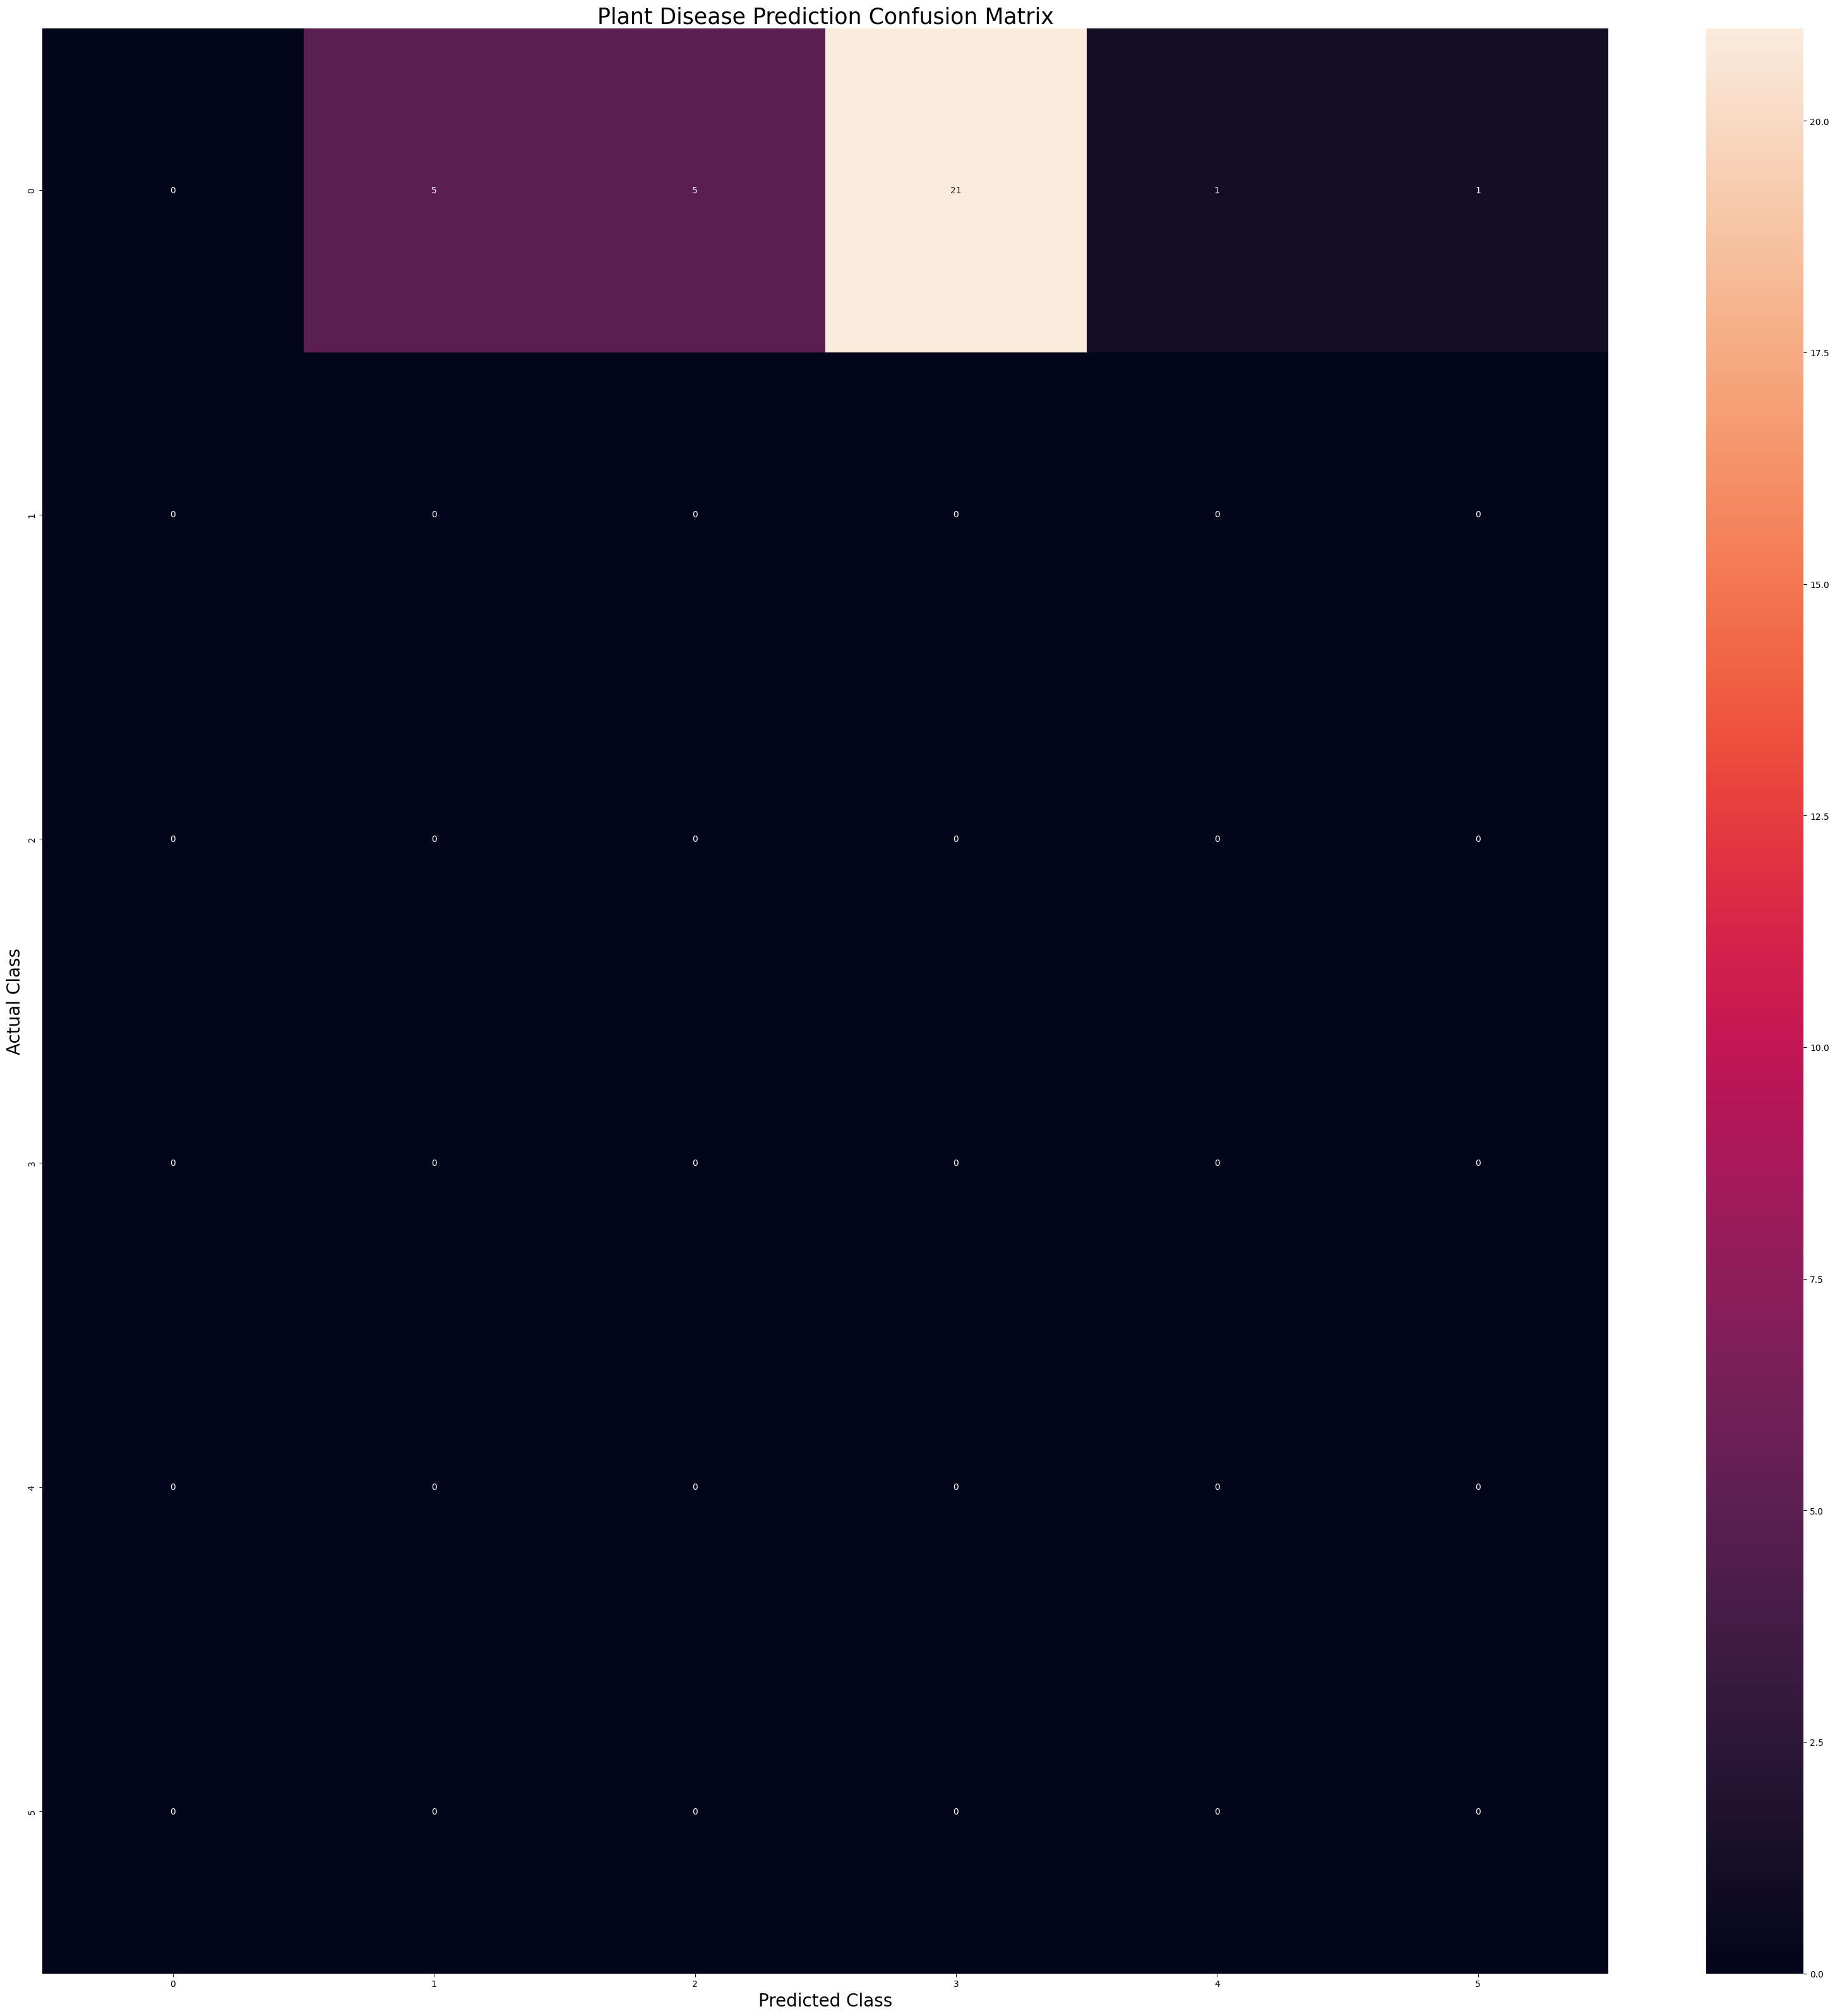

In [ ]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

<Axes: >

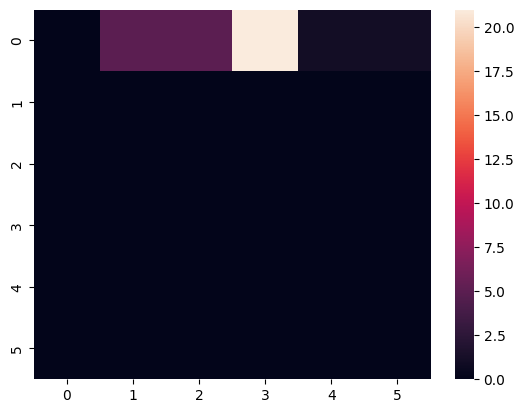

In [ ]:
sns.heatmap(cm)